In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

font={'family':'serif',
      # 'style':'italic',  # 斜体
      'weight':'normal',
      # 'color':'red',
      'size': 18
}  
def setfigform_simple(xlabel, ylabel=None, xlimit = (None,None), ylimit = (None, None)):
    # plt.legend(fontsize = 16, frameon=False),
    plt.xlabel(xlabel, fontdict = font)
    plt.ylabel(ylabel, fontdict = font)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    plt.xticks(fontsize = font['size'], fontname = "serif")
    plt.yticks(fontsize = font['size'], fontname = "serif")
    plt.tick_params(direction="in")

In [3]:
def readlog(dir, trainlosskeyword="train_loss"):
    alltrainsteps_baseline = []
    alltrainlosses_baseline = []
    allvalsteps_baseline = []
    allvallosses_baseline = []
    with open(os.path.join(dir, "log.out")) as fp:
        lines = fp.readlines()
        for line in lines:
            l = line.split()
            if "val_loss" in line:
                for idx_t,t in enumerate(l):
                    if "val_loss" in t:
                        allvallosses_baseline.append(float(l[idx_t+1].replace(",","")))
                    if "\'epoch\'" in t:
                        allvalsteps_baseline.append(float(l[idx_t+1].replace(",","")))
                continue
            if trainlosskeyword in line:
                for idx_t,t in enumerate(l):
                    if trainlosskeyword in t:
                        alltrainlosses_baseline.append(float(l[idx_t+1].replace(",","")))
                    if "\'epoch\'" in t:
                        alltrainsteps_baseline.append(float(l[idx_t+1].replace(",","")))

    return alltrainlosses_baseline, alltrainsteps_baseline, allvallosses_baseline, allvalsteps_baseline

In [4]:
def plot_3losses(dir_dir_b1024, k2 = "train_RCLoss", k3 = "train_CELoss", after_epoch=None):
    after_idx = 0
    plt.rcParams["figure.figsize"] = (17,5)
    fig = plt.figure()
    alltrainlosses_dir_b1024, alltrainsteps_dir_b1024, allvallosses_dir_b1024, allvalsteps_dir_b1024 = readlog(dir_dir_b1024)
    if after_epoch is not None:
        after_idx = np.where(np.array(alltrainsteps_dir_b1024)==float(after_epoch))[0][-1]
    plt.subplot(131)
    plt.scatter(np.array(alltrainsteps_dir_b1024[after_idx:]), alltrainlosses_dir_b1024[after_idx:])
    plt.semilogy()
    setfigform_simple("epoch","loss")
    plt.title(dir_dir_b1024, fontdict=font)
    
    alltrainlosses_dir_b1024, alltrainsteps_dir_b1024, allvallosses_dir_b1024, allvalsteps_dir_b1024 = readlog(dir_dir_b1024, trainlosskeyword=k2)
    if after_epoch is not None:
        after_idx = np.where(np.array(alltrainsteps_dir_b1024)==float(after_epoch))[0][-1]
    plt.subplot(132)
    plt.scatter(np.array(alltrainsteps_dir_b1024)[after_idx:], alltrainlosses_dir_b1024[after_idx:])
    plt.semilogy()
    setfigform_simple("epoch",k2)
    
    alltrainlosses_dir_b1024, alltrainsteps_dir_b1024, allvallosses_dir_b1024, allvalsteps_dir_b1024 = readlog(dir_dir_b1024, trainlosskeyword=k3)
    if after_epoch is not None:
        after_idx = np.where(np.array(alltrainsteps_dir_b1024)==float(after_epoch))[0][-1]
    plt.subplot(133)
    plt.scatter(np.array(alltrainsteps_dir_b1024)[after_idx:], alltrainlosses_dir_b1024[after_idx:])
    plt.semilogy()
    setfigform_simple("epoch",k3)
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.legend(fontsize=font["size"]-4)
    fig.tight_layout()

In [5]:
def plot_1losses(dir_dir_b1024, after_epoch=None):
    plt.rcParams["figure.figsize"] = (6,5)
    fig = plt.figure()
    alltrainlosses_dir_b1024, alltrainsteps_dir_b1024, allvallosses_dir_b1024, allvalsteps_dir_b1024 = readlog(dir_dir_b1024)
    after_idx = 0
    if after_epoch is not None:
        after_idx = np.where(alltrainsteps_dir_b1024==after_epoch)[-1]
        
    # plt.subplot(121)
    plt.scatter(np.array(alltrainsteps_dir_b1024[after_idx:]), alltrainlosses_dir_b1024[after_idx:])
    plt.semilogy()
    setfigform_simple("epoch","loss")
    plt.title(dir_dir_b1024, fontdict=font)
    
    # plt.subplot(122)
    # plt.scatter(np.array(alltrainsteps_dir_b1024[5:]), alltrainlosses_dir_b1024[5:])
    # setfigform_simple("epoch","loss")

    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.legend(fontsize=font["size"]-4)
    fig.tight_layout()

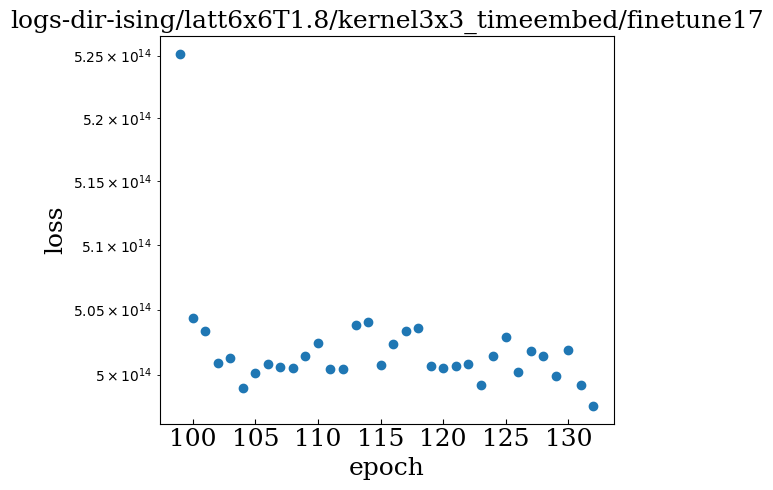

In [6]:

dir = "logs-dir-ising/latt6x6T1.8/kernel3x3_timeembed/finetune17"
plot_1losses(dir)

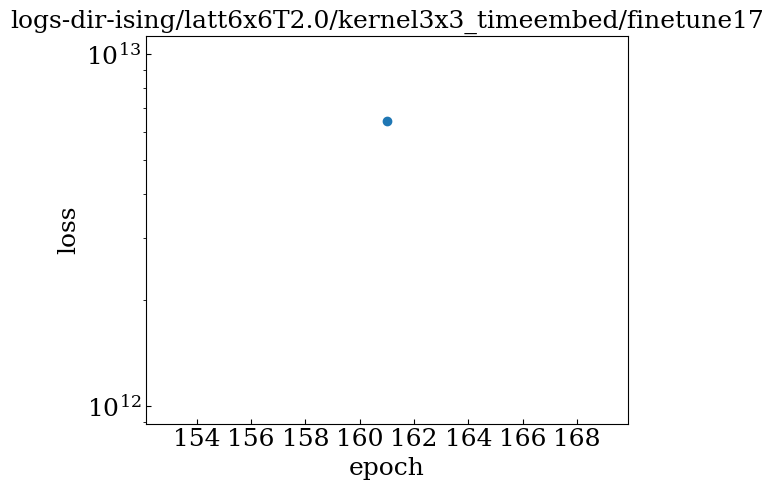

In [7]:

dir = "logs-dir-ising/latt6x6T2.0/kernel3x3_timeembed/finetune17"
plot_1losses(dir)

In [8]:
raise RuntimeError
plt.rcParams["figure.figsize"] = (6,5)
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter
l_d_smooth = savgol_filter(alltrainlosses_dir_b1024, window_length=3, polyorder=2)
error = (np.max(alltrainlosses_dir_b1024[-50:])-np.min(alltrainlosses_dir_b1024[-50:]))/2
print(error)
# Plot the smoothed data
plt.plot(alltrainsteps_dir_b1024, l_d_smooth, label='Dirichlet basis', color='blue')

# Add error bars
plt.fill_between(alltrainsteps_dir_b1024, l_d_smooth - error, l_d_smooth + error, color='blue', alpha=0.2)

# Optionally plot the original data
# plt.scatter(alltrainsteps_dir_b1024, alltrainlosses_dir_b1024, color='gray', alpha=0.5, label='Original Data')
setfigform_simple("epoch","loss", xlimit=(None, None))
plt.legend(fontsize=font["size"]-2)

RuntimeError: 

In [ ]:
t = np.load("seq_t.npy")
plt.hist(t, bins=100)